<a href="https://colab.research.google.com/github/malekslokom/Bayesian-Network/blob/main/heartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset: https://drive.google.com/file/d/17vwRLAY8uR-6vWusM5prn08it-BEGp-f/view


source: https://www.vtupulse.com/machine-learning/bayesian-network-in-python-using-pgmpy/

In [2]:
!pip install pgmpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 9.1 MB/s 


In [3]:
import numpy as np
import pandas as pd
import csv 
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
heartDisease = pd.read_csv('heart.csv')
heartDisease.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [5]:
heartDisease.isnull().sum()

age             0
gender          0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
heartdisease    0
dtype: int64

In [12]:
heartDisease['thalach'].unique()

array([150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 142,
       173, 162, 174, 168, 139, 171, 144, 132, 158, 114, 151, 161, 179,
       120, 112, 137, 157, 169, 165, 123, 128, 152, 140, 188, 109, 125,
       131, 170, 113,  99, 177, 141, 180, 111, 143, 182, 156, 115, 149,
       145, 146, 175, 186, 185, 159, 130, 190, 136,  97, 127, 154, 133,
       126, 202, 103, 166, 164, 184, 124, 122,  96, 138,  88, 105, 194,
       195, 106, 167,  95, 192, 117, 121, 116,  71, 118, 181, 134,  90])

In [13]:
heartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   gender        303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trestbps      303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  heartdisease  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [14]:
heartDisease['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [15]:
heartDisease = heartDisease.replace('?',np.nan)


In [16]:
heartDisease.isnull().sum()

age             0
gender          0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
thal            2
heartdisease    0
dtype: int64

In [21]:
heartDisease.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease'],
      dtype='object')

In [24]:
model= BayesianModel([('age','heartdisease'),('gender','heartdisease'),('exang','heartdisease'),('cp','heartdisease'),('heartdisease','restecg'),('heartdisease','chol')])
print('\nLearning CPD using Maximum likelihood estimators')
model.fit(heartDisease,estimator=MaximumLikelihoodEstimator)

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,



Learning CPD using Maximum likelihood estimators


In [27]:
model.get_cpds()


[<TabularCPD representing P(age:41) at 0x7f413619cf50>,
 <TabularCPD representing P(heartdisease:5 | age:41, cp:4, exang:2, gender:2) at 0x7f420feff1d0>,
 <TabularCPD representing P(gender:2) at 0x7f4137f7ae50>,
 <TabularCPD representing P(exang:2) at 0x7f41380c9d10>,
 <TabularCPD representing P(cp:4) at 0x7f4136135d90>,
 <TabularCPD representing P(restecg:3 | heartdisease:5) at 0x7f4136135750>,
 <TabularCPD representing P(chol:152 | heartdisease:5) at 0x7f4136135dd0>]

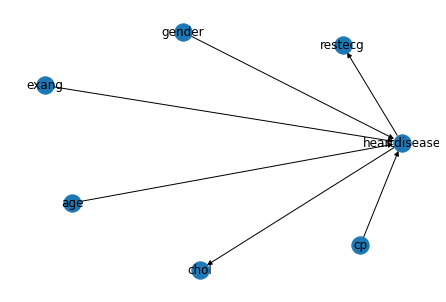

In [31]:
import networkx as nx
import pylab as plt
nx.draw(model, with_labels=True)


In [29]:
print('\n Inferencing with Bayesian Network:')
HeartDiseasetest_infer = VariableElimination(model)


 Inferencing with Bayesian Network:


In [30]:
print('\n 1. Probability of HeartDisease given evidence= restecg')
q1=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'restecg':1})
print(q1)


 1. Probability of HeartDisease given evidence= restecg


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.1012 |
+-----------------+---------------------+
| heartdisease(1) |              0.0000 |
+-----------------+---------------------+
| heartdisease(2) |              0.2392 |
+-----------------+---------------------+
| heartdisease(3) |              0.2015 |
+-----------------+---------------------+
| heartdisease(4) |              0.4581 |
+-----------------+---------------------+


In [32]:
print('\n 2. Probability of HeartDisease given evidence= cp ')
q2=HeartDiseasetest_infer.query(variables=['heartdisease'],evidence={'cp':2})
print(q2)


 2. Probability of HeartDisease given evidence= cp 


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3610 |
+-----------------+---------------------+
| heartdisease(1) |              0.2159 |
+-----------------+---------------------+
| heartdisease(2) |              0.1373 |
+-----------------+---------------------+
| heartdisease(3) |              0.1537 |
+-----------------+---------------------+
| heartdisease(4) |              0.1321 |
+-----------------+---------------------+
